# [NAME REDACTED] Take Home Task – David Heasman – Part 1 Loading, Cleaning, and Joining the Data

## Contents

**Part 1**
1. Introduction
2. Loading the data
    1. Loading the tables
    2. Inspecting the data
    3. Counting and duplicates
    4. Eliminating duplicates
3. Joining the datasets

**Part 2**
1. Introduction
2. Summary of answers
3. Question 1 – What's the average quote price?
4. Question 2 – Which factors influence price, and how?
    1. Exploratory analysis and hypothesis
        1. Investigating insured amount
        2. Investigating excess required
        3. Investigating previous claim count
        4. Investigating number of bedrooms
        5. Investigating number of bathrooms
        6. Wildcard investigations
    2. Explanatory analysis and answer to Question 2
5. Question 3 – If we only allow customers to purchase with no previous claims, what % eligbility would we have, based on the customers in the sample?
6. Question 4 – Does the data suggest we price differently based on which partner a customer comes through?
7. Question 5 – Suggest some improvements to the pricing process
8. Thank you



## Introduction

Hi [NAME REDACTED] Team. 

This is my (David Heasman) Jupyter Notebook's write up of the SQL take home task for the Senior Data Analyst Role. 

It's divided into two parts:

1. Part 1 – Loading, Cleaning and Joining the Data (this document)
2. Part 2 – Analysis and Answers

If you want to skip the write-up of how I cleaned and joined the data, and go straight to the answers, you can close this, and open **Part 2**, which is also provided in the zipped file I sent over. 

### Why Jupyter?

This was a fun and exciting challenge. I chose to write this up in Jupyter, because:

1. Exporting SQL code with comments is great for cleaning and joining, but for describing the analysis isn't great. 2. You can inspect my SQL code as you read along.
3. You can skip to the parts that are relevant (e.g. the part on loading tables might not be relevant. I initially used a GUI browser for it, but then did it in terminal for consistency's sake). 
4. Jupyter is just easier to read. 


### Environment Housekeeping

This is exported as a static HTML, so no need to try and run the code, or setup the environment yourself. 

To make this work in Jupyter, in the time given, this was run in iPython, but with a SQL module installed (jupysql).

SQL commands are then run in Jupyter with the magic sql command `%sql` or `%%sql`. 

Comments are provided in SQL format `--`. 

The upside is that queries can be done straight in Jupyter, and you can see the output. 

The downside is that the iPython terminal boxes don't mark up the code as SQL, so you'll need to do without coloured markups. 

Jupysql has limitations, and can't do everything SQL does (we are running SQL in Python after all). For instances where we ran into limitations, the work was done in terminal (with sqlite3), and then the code and the results were copied over and marked down. 

When this is done, you'll see the snippet *"This work was carried out in terminal."*

Finally, everything was done in SQLite.

If there are any issues, or you have any questions, let me know!

Now onto the write up, and loading the data.

## Loading the data

### Loading the tables

Firstly, the excel file tabs were saved as CSVs in Excel, because there were only 4 CSVs. 

Then the following commands were run in the terminal (sqlite on macos) to create the database, and import the CSVs

```SQL
--create and open database
.open name_redacted_sample_data.db

--import the csvs into the database

.mode csv
.import sample_requests.csv sample_requests
.import sample_purchases.csv sample_purchases
.import sample_third_party.csv sample_third_party
.import sample_responses.csv sample_responses

--received a response in terminal of empty column headers for column 3 to 26 for sample_responses. 
--Inspect sample_responses
.schema sample_responses

--Response from terminal below for reference
'''
CREATE TABLE IF NOT EXISTS "sample_responses"(
"quote_id" TEXT, "price" TEXT, "?_3" TEXT, "?_4" TEXT,
 "?_5" TEXT, "?_6" TEXT, "?_7" TEXT, "?_8" TEXT,
 "?_9" TEXT, "?_10" TEXT, "?_11" TEXT, "?_12" TEXT,
 "?_13" TEXT, "?_14" TEXT, "?_15" TEXT, "?_16" TEXT,
 "?_17" TEXT, "?_18" TEXT, "?_19" TEXT, "?_20" TEXT,
 "?_21" TEXT, "?_22" TEXT, "?_23" TEXT, "?_24" TEXT,
 "?_25" TEXT, "?_26" TEXT);
'''



--Notice price is in text, will need to change data type. 

SELECT *
FROM sample_responses
LIMIT 10;

--Columns 3 to 26 are empty. Deleting columns with the following command. Iterating between column "?_3 to ?_26"
--sqlite limitations, can only delete 1 column at a time. Only including one command for brevity sake
ALTER TABLE sample_responses
DROP COLUMN "?_3";

--Altering datatypes, as everything imported as text datatype. Sqlite limitations means no alter 
--column datatypecommand, so selecting into new table and deleting old table

--Altering sample_responses
CREATE TABLE new_sample_responses (
    "quote_id" TEXT, "price" INTEGER
);

INSERT INTO new_sample_responses
SELECT * FROM sample_responses;

DROP TABLE sample_responses;

ALTER TABLE new_sample_responses
RENAME TO sample_responses;

--Altering sample_requests
CREATE TABLE new_sample_requests (
    "user_id" TEXT, "quote_id" TEXT, "partner" TEXT, "payment_frequency" TEXT, "date" "TEXT", "number_bedrooms"
    INTEGER, "number_bathrooms" INTEGER, "excess_requested" INTEGER, "insured_amount" TEXT, "third_party_id" TEXT
);


INSERT INTO new_sample_requests
SELECT * FROM sample_requests;

DROP TABLE sample_requests;

ALTER TABLE new_sample_requests
RENAME TO sample_requests;

--Altering sample_third_party
CREATE TABLE new_sample_third_party (
    "id" TEXT, "previous_claim_count" INTEGER
);

INSERT INTO new_sample_third_party
SELECT * FROM sample_third_party;

DROP TABLE sample_third_party;

ALTER TABLE new_sample_third_party
RENAME TO sample_third_party;
```

### Inspecting the data

First let's load the sql kernel, and connect to the database.

In [2]:
#Load the SQL kernel. 
%load_ext sql

There's a new jupysql version available (0.10.12), you're running 0.10.9. To upgrade: pip install jupysql --upgrade
Deploy FastAPI apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [3]:
#Connecting to database
%sql sqlite:///name_redacted_sample_data.db

Connecting to 'sqlite:///name_redacted_sample_data.db'

Let's inspect the data

In [4]:
%%sql
--Inspecting sample_responses

SELECT * 
FROM sample_responses 
LIMIT 10;

Running query in 'sqlite:///name_redacted_sample_data.db'

quote_id,price
brp8VbYOJGP3+SdO36eUlursaYv+pzoUZsZN290dNnI=,684
/i90e/lE6ktpxvu26EkMBr7bQ1kZ2/fwbQ/ZHW0fltU=,840
TSyq9PiNc6USR21mb8pT/0EMrtcPztITr0QwTuL19Jw=,57
MxYAC56QiELVdGXYnNiyEPUEc52rkvKag8kukvdnL20=,1092
7Qh2sJq1e7BUUVr7R03S8If1DLl+nPsWt4LZX411CHM=,68
rPK7Y71DLAxK+XjFmdTe5LBpHnHR1Fw2j2CmEyCGYtc=,1044
+lOgZHeTD6LBiCHLajJOeECvlrebrz70QFH0ibYOvOA=,768
DkLjWX3rfMAvpeCHoWf8FCcccsGWCi4zRiUB2+QbNjs=,59
ImJkQUeaf1bs8ahErVBP9xTvdW7RfhwX+G3yY9NAHzg=,996
Bj+DxL9TTIuX21cxTUp4MhNklGRZ+egZYTCFvY12h40=,804


In [5]:
%%sql
--Inspecting sample_requests

SELECT *
FROM sample_requests
LIMIT 10;

Running query in 'sqlite:///name_redacted_sample_data.db'

user_id,quote_id,partner,payment_frequency,date,number_bedrooms,number_bathrooms,excess_requested,insured_amount,third_party_id
8wJTHd5uLwtI7NKFH5S55I/+PAVKVqn+jjUGgXXZRKQ=,MKKVFhxVt+5WUvP8MBiOoM5VFfyqpZUzQv7pkDzI8yg=,CompareTheIndustry,monthly,2023-07-16,3,1,150,30k to 40k,
YiDb2sKMnA79kDED8/UeVuhMrNzFsrvioaOBMLRS1wg=,abd+na4tgIn9k3f16YaXmvAqPZiT91rkH8yp9+W+Cvo=,BuyYourInsurance,monthly,2023-07-18,4,2,250,30k to 40k,ingdhKC/b+sIfUlqd0WjZUuAQitP2jq5YhsWnLmJ+Rw=
iDUCWN1mnXp6Us/oy6xF+Qpptm+701Iwo980gKB28b0=,Q7Nzh938y8RYyYO3BAxZcyg6HLC3vKZu4D8ste17uBM=,CompareTheIndustry,annual,2023-07-28,3,2,250,10k to 15k,
G+JOWFrCBd85ZlF8wWWRf8cbRAH2iV9/u9b49SIXOTA=,6yFrRfPrWxrvXBXEP3DHKeC0LBfBXlCPL1TDYyo2j9g=,BuyYourInsurance,annual,2023-07-01,3,1,150,20k to 30k,V9x2tzH66Bhu/oQakDZ6wHyQTXjzdVFT9fqIj/BD3gE=
aKy1fjb/DCo+4BUfY67oyvhokn6SOo2Ezgf9H/oxBaw=,4dv8BPwp4R3jlKMf34zDwdRHsV3hUeIz6sFJtyUzp2g=,CompareTheIndustry,monthly,2023-07-04,2,2,0,10k to 15k,
Bx3WB7AznxzFnZfFyF+FUz+K+RpIVt/3FyzspGDW72o=,2YrUh/Rj+Ad/l8QspDyerUxqzqhcEm7s2JDT5Oph0Yk=,CompareTheIndustry,monthly,2023-07-25,3,1,250,30k to 40k,
JvibR++T80xum0A7AkgNXI55pA3tjwUC/gTkb2fw0i0=,NV+lmzQT+IXZQxvG1uSbvO4o2fSfSREKS6Tk9hwehXs=,CompareTheIndustry,annual,2023-07-20,5,2,250,40k to 50k,
4D/+H9amKLDKZUdrhLNCWO4xQ20g4e5qHR9p2Dz32Ys=,a2xxDKcb203cHojHtMVe9HhFIrA++qF2OrSHdyuW9+8=,QuantumPartners,annual,2023-07-31,3,2,250,60k to 80k,
BXlPh6h/i5WSlk/UvVB+b9HjOGVCWjlJIXHjPVAH14M=,86+OImVNkIklcF9nJL9sZNFW/JFndNsE94JpA8vlFF4=,BuyYourInsurance,annual,2023-07-17,3,1,150,30k to 40k,4lx5ZWlo4Y8hVasEQkJRHo5o4hscFF7V8A88io/V91M=
/xZbQVuevSTjEHI6rLLu7czRz5JXvcjVdsbySp8Xbzo=,1u7R6iW+AEDJRvWUESmB9NkhG1aJZtFVZUhAQoJ7AAY=,QuantumPartners,annual,2023-06-24,4,2,0,50k to 60k,


In [6]:
%%sql
--Inspecting sample_third_party

SELECT *
FROM sample_third_party
LIMIT 10;

Running query in 'sqlite:///name_redacted_sample_data.db'

id,previous_claim_count
P3bIVUfL5tWEkxOW1uNxtnwiETygQX90G7msqOHZts8=,0
VcbOlqg5fPz91sdC27e5BgzorrhlDM6uGfX9Pbpif5s=,0
NSwx5lcliSSNQ5S/iXop+aGIaKuXjoG++8vYnbHq2iI=,0
HrIFKEAp4ymqLs46L26kLO5T0ustTPrBBouH2st1sjQ=,0
VcqrXbIThoVqF1t9f37zoKnnRVp4bANgG+NUjp5OcWY=,0
2Whwl7ViBV23weyWBZO8I0PNcJX6HQOgRxuef7QylVU=,0
yMQTA47XuaP2n3+9eyiDa8wLL2YPg3cdj5Lc3+U/8Ys=,0
GWkShfhJd7nNqJpemy7uWwWyCPY1ppkrPAe+7jDh60s=,0
wjmKyso7HcgcJ4MXa+0j6vMI1Q8bIAMw1ihGhB9bbik=,1
HaVpKls/h03WmRh0dt90NjGJWHlJ+pMoInnwcVA+CVM=,0


In [7]:
%%sql
--Inspecting sample_purchases

SELECT * 
FROM sample_purchases
LIMIT 10;

Running query in 'sqlite:///name_redacted_sample_data.db'

quote_id,purchase_date
cmzjWjZ2cdorcQT7dVWRw8BkAVK2QRVm2DgaPFG/h/w=,2023-07-02
7sKNl0gHZs6hfFAmcDXcrinrG2sgi79cA4HH1AYWr9g=,2023-07-31
FboylKvR2abLnGLFDR9+txbrXodohn8ULdMBCEq/Zfo=,2023-07-27
4J3JKWuXXeG1YZAotdAstRGLPWh31D7y9qOrut4sleg=,2023-07-22
m5/1pibbEa7VWvZEWy572riKyaLD4grvKkN4+Jhiu0M=,2023-06-07
6hjgIiZR6MDv400vKoF1yPYJTT4QHlb0yt2cW0183xg=,2023-07-20
2rd5ZgZ3ThjZ4NQH0zcSuSoFyEQl8xssi4vOGfEWfyQ=,2023-07-27
G9tFjiS4h1XIAoOTuRUhj0eMoCZOfbp1Vz719sKrCxY=,2023-07-20
5p60SQOa1Ikgp2U9BfOy9M8J+wwtudbtlykubW4cGIA=,2023-07-25
GkQnVirmBP9w/A8p/yVIHeuPAb0r+QyxhM1XarM/DC4=,2023-07-07


From exploratory analysis, the keys to join datasets are
 - quote_id (found in sample_purchases, sample_requests, and sample_responses
 - third_party_id (found in sample_requests, and in sample_third_party as "id")
 
### Counting and Duplicates 
Before joining let's have a look at the counts, and see if there any duplicates

In [8]:
%%sql
--Counting all rows and distinct rows to find duplicates in sample_responses

SELECT COUNT(*), COUNT(DISTINCT(quote_id))
FROM sample_responses;

Running query in 'sqlite:///name_redacted_sample_data.db'

COUNT(*),COUNT(DISTINCT(quote_id))
10008,10001


In [9]:
%%sql
--Counting all rows and distinct rows to find duplicates in sample_resquests for quote_id field

SELECT COUNT(*), COUNT(DISTINCT(quote_id))
FROM sample_requests;

Running query in 'sqlite:///name_redacted_sample_data.db'

COUNT(*),COUNT(DISTINCT(quote_id))
10010,10000


In [10]:
%%sql
--Counting all rows and distinct rows to find duplicates in sample_requests for third_party_id field

SELECT COUNT(*), COUNT(DISTINCT(third_party_id))
FROM sample_requests;

Running query in 'sqlite:///name_redacted_sample_data.db'

COUNT(*),COUNT(DISTINCT(third_party_id))
10010,2792


In [11]:
%%sql
--Counting all rows and distinct rows to find duplicates in sample_purchases

SELECT COUNT(*), COUNT(DISTINCT(quote_id))
FROM sample_purchases;

Running query in 'sqlite:///name_redacted_sample_data.db'

COUNT(*),COUNT(DISTINCT(quote_id))
785,785


In [12]:
%%sql
--Counting all rows and distinct rows to find duplicates in sample_third_party

SELECT COUNT(*), COUNT(DISTINCT("id"))
FROM sample_third_party;

Running query in 'sqlite:///name_redacted_sample_data.db'

COUNT(*),"COUNT(DISTINCT(""id""))"
2792,2792


We have the following counts, and count distincts for the tables

| Table                            | Count  | Count (Distinct) |
| -------------------------------- | ------ | ---------------- |
| sample_responses                 | 10,008 | 10,001           |
| sample_requests (quote_id)       | 10,010 | 10,000           |
| sample_requests (third_party_id) | 10,010 | 2792             |
| sample_purchases                 | 785    | 785              |
| sample_third_party               | 2792   | 2792             |

This suggests there are duplicates in sample_responses and sample_requests for the "quote_id" key. 

Let's inspect those duplicates

#### sample_requests duplicates

The following will bring up the quote_id of the duplicates

In [13]:
%%sql
--Inspect the quote_id of the duplicates in sample_requests

SELECT quote_id, COUNT(*)
FROM sample_requests
GROUP BY quote_id
HAVING COUNT(*) > 1;

Running query in 'sqlite:///name_redacted_sample_data.db'

quote_id,COUNT(*)
P0dbjco0jXLgp1LRMX9kExT9Ab7gPNwFiNY/HxFtPGQ=,2
TJXtnrR7IBOZiGWwxIv5lmhGqyT4or8Q0wGQjVY9ZJE=,2
WV+22d4XELmRCv+xilrggvTUJGTfJnRSgztA1Qm1iPw=,2
aBCDwIExh6eFs96gqB9IycZ7cFs1tb3jC/+v/1xAPqg=,2
bH6jzxfXuVijF6wkN2HbyVje6E1/RG15K/qRwRE7udI=,2
lX5FQBDQqchALVCN5zT5iS7o5tnQXuQ2t97BJNKmb28=,2
ptM2dub14Shar7fvckUbFd5yNe+FDGL3WJkb9xb+g5Q=,2
rUOXxsSiH+QOYM8LJh8azmAh7onI1CJlD3XkeMzu9H8=,2
vF7EpnGHFUTOAmEe9E43Zac6LQvnLxPh9O4E/gdsfOM=,2
vJQSb7bXYgoUZiHDY3YEp32Iv7vOiVjoBd5woh6SSmQ=,2


Inspecting the duplicates to see if they are true duplicates, and can be eliminated, or hold information of value. 

*(This was done in terminal, as it isnt straightforward to create tables or views in jupyter notebooks with jupysql).*

```SQL
--Creating a view of the IDs of the duplicates
CREATE VIEW sample_requests_quote_id_duplicates
AS
(SELECT quote_id, COUNT(*)
FROM sample_requests
GROUP BY quote_id
HAVING COUNT(*) > 1);
```

```SQL
--join the view to the dataset to see the duplicates
SELECT *
FROM sample_requests_quote_id_duplicates
INNER JOIN sample_requests
ON sample_requests_quote_id_duplicates.quote_id = sample_requests.quote_id
ORDER BY quote_id
```

#### Duplicates in sample_requests

| quote_id                                     | COUNT(*) | user_id                                      | quote_id                                     | partner            | payment_frequency |
| -------------------------------------------- | -------- | -------------------------------------------- | -------------------------------------------- | ------------------ | ----------------- |
| P0dbjco0jXLgp1LRMX9kExT9Ab7gPNwFiNY/HxFtPGQ= | 2        | RHZTQkVGK0GbTCgicvW4pIsduHf8bJOFe+cljSjQ588= | P0dbjco0jXLgp1LRMX9kExT9Ab7gPNwFiNY/HxFtPGQ= | BuyYourInsurance   | annual            |
| P0dbjco0jXLgp1LRMX9kExT9Ab7gPNwFiNY/HxFtPGQ= | 2        | RHZTQkVGK0GbTCgicvW4pIsduHf8bJOFe+cljSjQ588= | P0dbjco0jXLgp1LRMX9kExT9Ab7gPNwFiNY/HxFtPGQ= | BuyYourInsurance   | annual            |
| TJXtnrR7IBOZiGWwxIv5lmhGqyT4or8Q0wGQjVY9ZJE= | 2        | b6eSyhQ04SaLBGqzqVRZmEvGlmQgDMDnVEbB6xZPFlM= | TJXtnrR7IBOZiGWwxIv5lmhGqyT4or8Q0wGQjVY9ZJE= | CompareTheIndustry | annual            |
| TJXtnrR7IBOZiGWwxIv5lmhGqyT4or8Q0wGQjVY9ZJE= | 2        | b6eSyhQ04SaLBGqzqVRZmEvGlmQgDMDnVEbB6xZPFlM= | TJXtnrR7IBOZiGWwxIv5lmhGqyT4or8Q0wGQjVY9ZJE= | CompareTheIndustry | annual            |
| WV+22d4XELmRCv+xilrggvTUJGTfJnRSgztA1Qm1iPw= | 2        | tgt8+rCr0h9FQ+0A6MNE6CvCW62aqIkX2hsYTAoY6Wc= | WV+22d4XELmRCv+xilrggvTUJGTfJnRSgztA1Qm1iPw= | CompareTheIndustry | monthly           |
| WV+22d4XELmRCv+xilrggvTUJGTfJnRSgztA1Qm1iPw= | 2        | tgt8+rCr0h9FQ+0A6MNE6CvCW62aqIkX2hsYTAoY6Wc= | WV+22d4XELmRCv+xilrggvTUJGTfJnRSgztA1Qm1iPw= | CompareTheIndustry | monthly           |
| aBCDwIExh6eFs96gqB9IycZ7cFs1tb3jC/+v/1xAPqg= | 2        | LwjpBwVxgEyZcpw1bEZG4cOclFkRzswzMA3CZsro6XU= | aBCDwIExh6eFs96gqB9IycZ7cFs1tb3jC/+v/1xAPqg= | QuantumPartners    | annual            |
| aBCDwIExh6eFs96gqB9IycZ7cFs1tb3jC/+v/1xAPqg= | 2        | LwjpBwVxgEyZcpw1bEZG4cOclFkRzswzMA3CZsro6XU= | aBCDwIExh6eFs96gqB9IycZ7cFs1tb3jC/+v/1xAPqg= | QuantumPartners    | annual            |
| bH6jzxfXuVijF6wkN2HbyVje6E1/RG15K/qRwRE7udI= | 2        | fxzf+LXb1k/E5cVjAMKuw57rn/w2u3UtA6AqopbG/8E= | bH6jzxfXuVijF6wkN2HbyVje6E1/RG15K/qRwRE7udI= | CompareTheIndustry | annual            |
| bH6jzxfXuVijF6wkN2HbyVje6E1/RG15K/qRwRE7udI= | 2        | fxzf+LXb1k/E5cVjAMKuw57rn/w2u3UtA6AqopbG/8E= | bH6jzxfXuVijF6wkN2HbyVje6E1/RG15K/qRwRE7udI= | CompareTheIndustry | annual            |
| lX5FQBDQqchALVCN5zT5iS7o5tnQXuQ2t97BJNKmb28= | 2        | ws9qnVnR4y36OQGluMBBczNQiK8GRj2F6iEl8Ky1Mms= | lX5FQBDQqchALVCN5zT5iS7o5tnQXuQ2t97BJNKmb28= | BuyYourInsurance   | monthly           |
| lX5FQBDQqchALVCN5zT5iS7o5tnQXuQ2t97BJNKmb28= | 2        | ws9qnVnR4y36OQGluMBBczNQiK8GRj2F6iEl8Ky1Mms= | lX5FQBDQqchALVCN5zT5iS7o5tnQXuQ2t97BJNKmb28= | BuyYourInsurance   | monthly           |
| ptM2dub14Shar7fvckUbFd5yNe+FDGL3WJkb9xb+g5Q= | 2        | q0Z0PCqEd/5IN92ajRIyW8qY5zVazCUIWZ75O5Y+w2w= | ptM2dub14Shar7fvckUbFd5yNe+FDGL3WJkb9xb+g5Q= | CompareTheIndustry | monthly           |
| ptM2dub14Shar7fvckUbFd5yNe+FDGL3WJkb9xb+g5Q= | 2        | q0Z0PCqEd/5IN92ajRIyW8qY5zVazCUIWZ75O5Y+w2w= | ptM2dub14Shar7fvckUbFd5yNe+FDGL3WJkb9xb+g5Q= | CompareTheIndustry | monthly           |
| rUOXxsSiH+QOYM8LJh8azmAh7onI1CJlD3XkeMzu9H8= | 2        | VnU8QS0+ONRe6TMl44gI4UYyc8Uh0SvoKZqyH96zzPk= | rUOXxsSiH+QOYM8LJh8azmAh7onI1CJlD3XkeMzu9H8= | CompareTheIndustry | annual            |
| rUOXxsSiH+QOYM8LJh8azmAh7onI1CJlD3XkeMzu9H8= | 2        | VnU8QS0+ONRe6TMl44gI4UYyc8Uh0SvoKZqyH96zzPk= | rUOXxsSiH+QOYM8LJh8azmAh7onI1CJlD3XkeMzu9H8= | CompareTheIndustry | annual            |
| vF7EpnGHFUTOAmEe9E43Zac6LQvnLxPh9O4E/gdsfOM= | 2        | MFRcb/D/5AiKhT/8Bl/ykATDme6Da8MrpDMf4s8856s= | vF7EpnGHFUTOAmEe9E43Zac6LQvnLxPh9O4E/gdsfOM= | CompareTheIndustry | annual            |
| vF7EpnGHFUTOAmEe9E43Zac6LQvnLxPh9O4E/gdsfOM= | 2        | MFRcb/D/5AiKhT/8Bl/ykATDme6Da8MrpDMf4s8856s= | vF7EpnGHFUTOAmEe9E43Zac6LQvnLxPh9O4E/gdsfOM= | CompareTheIndustry | annual            |
| vJQSb7bXYgoUZiHDY3YEp32Iv7vOiVjoBd5woh6SSmQ= | 2        | SqlwoKZ2nxOjU7v867TuNeglyRfk4Yumz0b4/GXs4zg= | vJQSb7bXYgoUZiHDY3YEp32Iv7vOiVjoBd5woh6SSmQ= | CompareTheIndustry | monthly           |
| vJQSb7bXYgoUZiHDY3YEp32Iv7vOiVjoBd5woh6SSmQ= | 2        | SqlwoKZ2nxOjU7v867TuNeglyRfk4Yumz0b4/GXs4zg= | vJQSb7bXYgoUZiHDY3YEp32Iv7vOiVjoBd5woh6SSmQ= | CompareTheIndustry | monthly           |

An inspection of the duplicate table shows that there are no distinguishing features in the duplicates. A duplicate doesn't hold any other information of value, and thus can be discarded (or grouped together).

Will assume this moving forward, and eliminate duplicates. 

### Eliminating duplicates
We'll eliminate duplicates in both sample_requests and sample_responses by turning them into a view, for the later join.

*This was done in terminal.*

```SQL
--Create view that is deduped sample_requests
CREATE VIEW sample_requests_deduped
AS
SELECT * 
FROM sample_requests 
GROUP BY quote_id;
```

```SQL
--Count to ensure it worked
SELECT COUNT(*)
FROM sample_requests_deduped;
```
Result is 10,000 rows. 

```SQL
--Create view that is deduped sample_responses
CREATE VIEW sample_responses_deduped
AS
SELECT * 
FROM sample_responses
GROUP BY quote_id;
```

```SQL
--Count to ensure it worked
SELECT COUNT(*)
FROM sample_responses_deduped;
```
Result is 10,001 rows.


## Joining the datasets

A brief overview of the sample datasets and how they work. 

### sample_requests
 - A customer asks for a quote on a price comparison website. Data is submitted on the partner, payment frequency, the number of bedrooms of the house, the number of bathrooms, the excess requested, and the insured amount.
 - Two relevant keys, **quote_id** and **third_party_id**.
 
### sample_responses
 - Data returned from [NAME REDACTED] on a quote for insurance. 
 - Key is **quote_id**

### sample_third_party
 - Data from an external industry database, on a customers previous claim's history, if it's available. 
 - relevant key is **id** which can be joined to **third_party_id** on the sample_requests table.
 
### sample_purchases
 - Data provided for customers who go on to purchase a quote
 - Key is **quote_id**
 
### Workflow summary

A summary of the workflow is below, with the relevant dataset
 
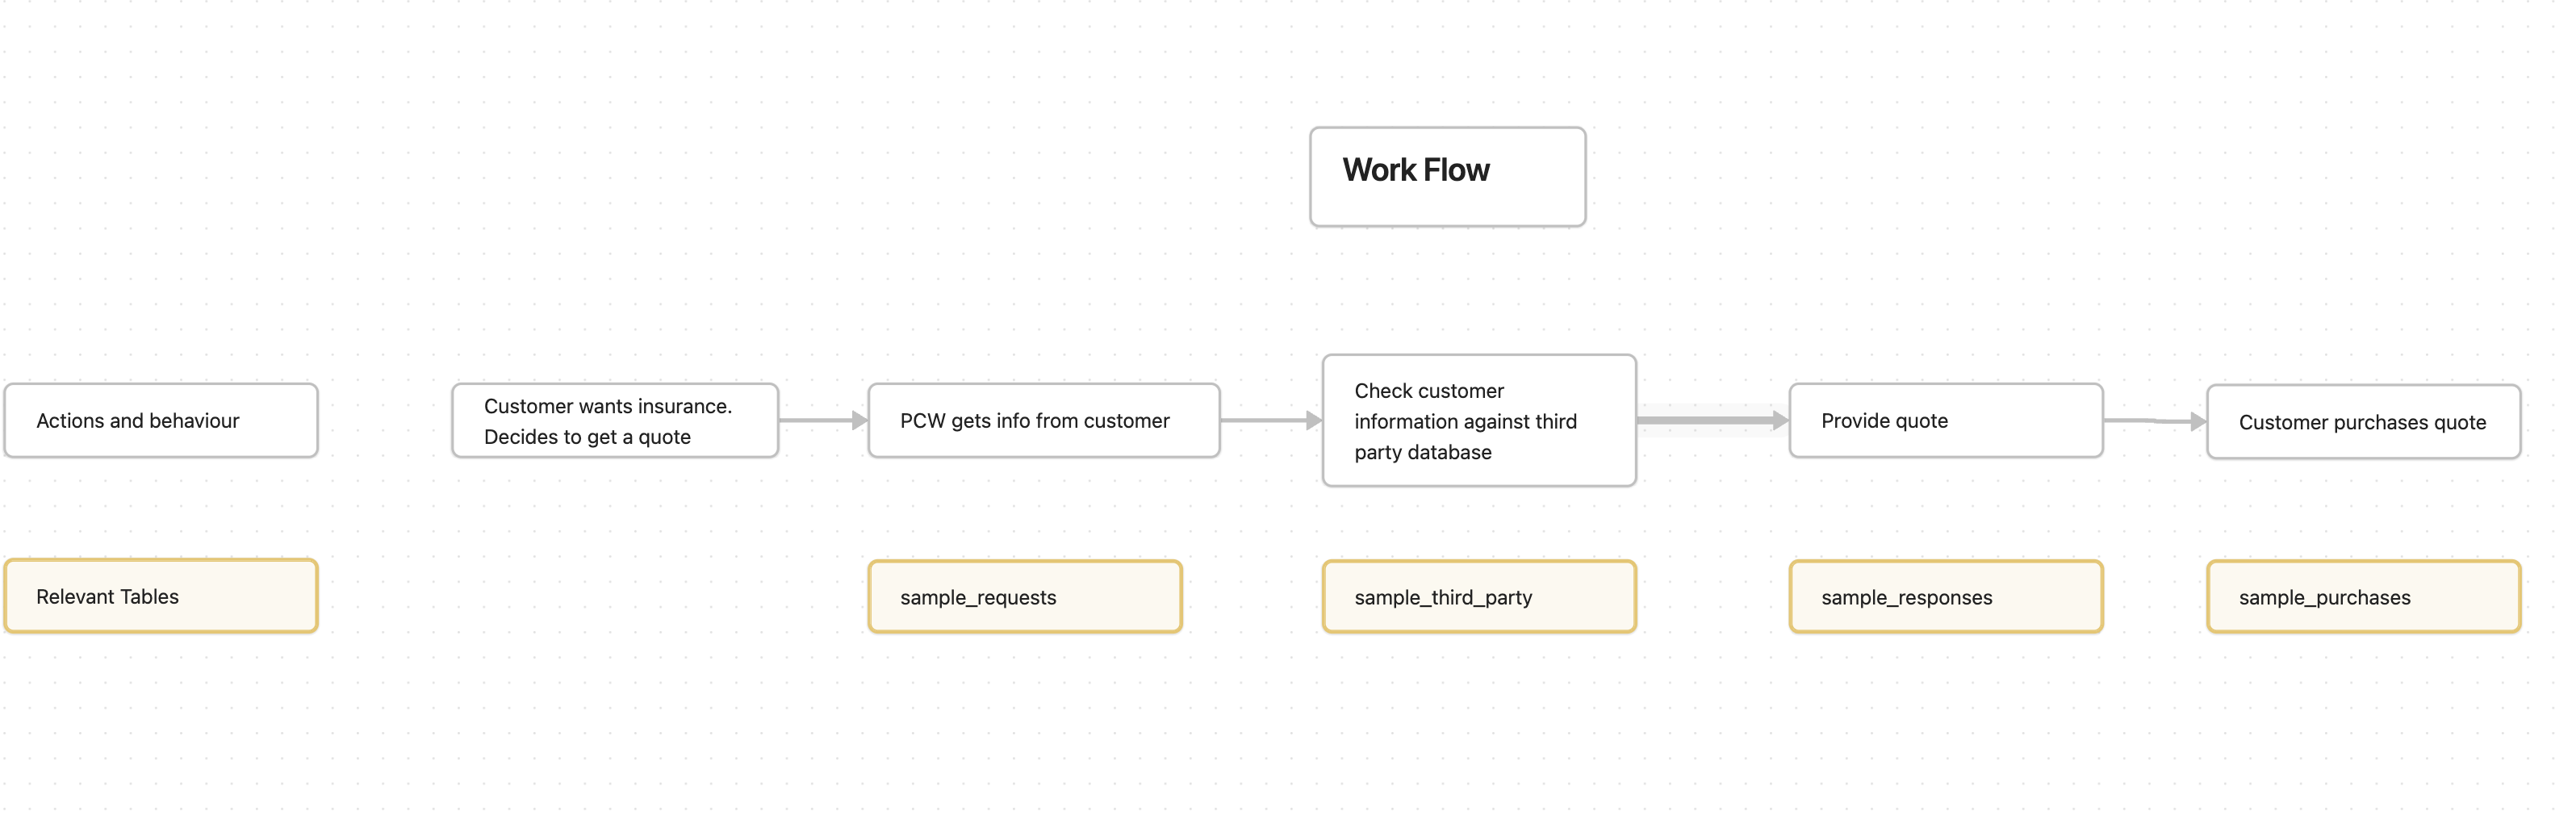


### Joining Workflow

We'll join the data in the order that the workflow works, and we'll be doing left joins. 

This assumes that we'll only want data for customers who've inputted their details into a price comparison website. 

So it'll go:
sample_requests -> sample_third_party -> sample_responses -> sample_purchases.

This join is done in terminal. 

Because we deduped the data (as views) for sample_requests and sample_responses, we'll be joining the deduped data, so the workflow will be:

sample_requests_deduped -> sample_third_party -> sample_responses_deduped -> sample_purchases.

*This was done in terminal.*

```SQL
CREATE TABLE insurance_joined_data 
AS
SELECT sample_requests_deduped.user_id, 
sample_requests_deduped.quote_id, 
 sample_requests_deduped.partner,
 sample_requests_deduped.payment_frequency,
 sample_requests_deduped.date,
 sample_requests_deduped.number_bedrooms,
 sample_requests_deduped.number_bathrooms,
 sample_requests_deduped.excess_requested,
sample_requests_deduped.insured_amount,
 sample_requests_deduped.third_party_id,
 sample_third_party.previous_claim_count,
 sample_responses_deduped.price,
 sample_purchases.purchase_date
FROM sample_requests_deduped
LEFT JOIN sample_third_party
ON sample_requests_deduped.third_party_id = sample_third_party.id
LEFT JOIN sample_responses_deduped
ON sample_requests_deduped.quote_id = sample_responses_deduped.quote_id
LEFT JOIN sample_purchases
ON sample_requests_deduped.quote_id = sample_purchases.quote_id;
```
 

In [14]:
%%sql
--View the joined data

SELECT * 
FROM insurance_joined_data
LIMIT 10;

Running query in 'sqlite:///name_redacted_sample_data.db'

user_id,quote_id,partner,payment_frequency,date,number_bedrooms,number_bathrooms,excess_requested,insured_amount,third_party_id,previous_claim_count,price,purchase_date,adjusted_price
gZOxqK3bwXYYEACC5y3whIPzhuI/2QLSyGxImHYoqt8=,++6ZW6HgehWy/ED2cQ0awN0sPgHHTIsshIP2BO+zujI=,CompareTheIndustry,monthly,2023-07-31,3,1,250,10k to 15k,,,70,None,840
J5KQhdCYs6KkLnRXZ/E+mUhslguKdR/54t0La61R6oQ=,+/O+e6NExEza50EUXfBXrRpgEwtR8AWFKOnhlhks8k4=,CompareTheIndustry,monthly,2023-06-09,2,1,100,15k to 20k,,,55,None,660
BTm04P8PLXZNUlExOLxMwRhBBzdnYN7aRxCCSoqEA6w=,+/XZLWHaryzJZ1524NPFHqznQLqYyJV1SpboEgusaGE=,CompareTheIndustry,monthly,2023-07-27,3,2,50,30k to 40k,,,60,None,720
0DeuQiViK8DD32RYYRt7NoABVf1+88oP+IbPUHHKg44=,+/sypDVflY25HZMXV9OzqKZjIORsf9zZ9Mszsqdyn9U=,BuyYourInsurance,annual,2023-07-01,2,1,250,50k to 60k,gdp7D8cfAUXVECdtE8TfaawN55ldfB0nHmmUsEoU5Ts=,0,852,None,852
XZASEsVVzSF1Uxc2QqRqyrbyAYwHVPf9RNv7TJgpKZY=,+0eTvnYmM96zg7q31XPe6PaZ3ctpGLMNuBTTXEMmsGs=,BuyYourInsurance,monthly,2023-06-16,3,2,250,60k to 80k,dEcqv0xgwYNUwFrRMWugEKkueA5X1lU250Lq5iPQB7Q=,0,71,2023-06-21,852
atR2Y4pPBtnfa5gOyl/yXxVZ1BS/0NvQgXfxihbz5k0=,+2Q9TMhCmW8n1XM9tyv842YUxFVbYeTfBy0j8c4lXXE=,CompareTheIndustry,monthly,2023-06-20,5,3,200,15k to 20k,,,94,None,1128
SL8raC06Y/vB035RR8JO6F1Fvcy+r5+tBj2GUQV3RUs=,+2wbRHNpv7SBI7/K9Le4Cpp+qU4CE5eIFjQtV6br8Bk=,BuyYourInsurance,annual,2023-06-14,3,1,0,10k to 15k,62NTiJ/F8SemvNj6YzSmQKQSJXAqL8GWRLRDGBY6fps=,0,960,None,960
YqfBTO8eX2mxjEUS+sJ9tRLFPczMJZHUScIdmvHN5HE=,+3+2YDj7m92eQ03VyxC9kaCemzz9aFyAs7IN/s8yYe8=,BuyYourInsurance,annual,2023-06-09,3,3,250,40k to 50k,8wjOpqCvHTwwSpNUVDg1Z1mHNEWLrG+68Ej6t7FAHNg=,0,888,None,888
ntHQBXMXLRhIkLFT7ZYMAg5kk7DVJCUCarLYhvnUrqM=,+3OlIFaJJbpdRhBylBJw5+iP2YWPfGeHtMNZfN37QkU=,BuyYourInsurance,monthly,2023-06-07,3,1,50,40k to 50k,pdK+tdSIxtHP/FofHhDp5dslDChpBrcemeDR2kYmf7g=,0,81,None,972
+i/5DZcFSCk7ZIe5VZi74Gy12mvMr/qpelogBKiIVsk=,+3QvKKjhXe6P9zLnFV3a8aweehA+KS/nnLp9ICPJfUo=,BuyYourInsurance,annual,2023-06-18,2,1,100,50k to 60k,SqRXt4O16Bt/u+q5HwzEnounZ2xZDSfsDTbl1kXeRt4=,0,828,None,828


Our tables are successfully joined, with the right datatypes (not fully relevant for sqlite, but good practice nonetheless), and duplicates for the larger sample datasets have been removed.

## Conclusion

We've loaded the data, inspected it, and deduped it. Now it's time to answer the questions.

**Go to "Part 2 – Analysis and Answers" for the answers to the take home task questions.**